In [1]:
library(Seurat)
library(tidyverse)
# library(doParallel)
# library(patchwork)

# library(scales)
library(slingshot)
# library(monocle3)
# library(tradeSeq)

library(ggplot2)
library(forcats) # 和 ggplot 一起给数据排序
library(psych)
library(ggrepel)
library(viridis)
library(ggpubr)

# library("GSEABase")
# library(AUCell)
# library(Matrix) 
source("/share/home/qlab/projects/qlab_yrs/scTools.R")
source("/share/home/qlab/projects/qlab_yrs/scPlot.R")
# library(ComplexHeatmap)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixS

In [35]:
library(msigdbr)
library(fgsea)
mdb_c2 <- msigdbr(species = "Homo sapiens", category = "C2")
mdb_rec = mdb_c2 [grep("^REACTOME",mdb_c2 $gs_name),]
## 预定义基因集：KEGG+rectome
mdb_c2 <- msigdbr(species = "Homo sapiens", category = "C2")
mdb_kegg = mdb_c2 [grep("^KEGG",mdb_c2 $gs_name),]
mdb_rec = mdb_c2 [grep("^REACTOME",mdb_c2 $gs_name),]
fgsea_kegg_sets <- mdb_kegg %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_rec_sets <- mdb_rec %>% split(x = .$gene_symbol, f = .$gs_name)
library("hypeR")
# gc()
#draw network
options(browser = "xdg-open")
biosets  <- list()
biosets[["BIOCARTA"]] <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:BIOCARTA")
biosets[["KEGG"]]     <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:KEGG")
biosets[["REACTOME"]] <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:REACTOME")
biosets[["GO"]] <- msigdb_gsets(species="Homo sapiens", category="C5", subcategory="BP")

Warning message:
“程辑包‘hypeR’是用R版本4.3.0 来建造的”


In [4]:
# --- Add annotations for a specific clustering
immune <- immune.cluster
immune@meta.data$fib_CellType <- as.character(immune@meta.data$fib_CellType)
immune@meta.data$fib_CellType[which(immune@meta.data$fib_CellType == 'Fib_COMP')] <- 'Fib_WIF1'
immune@meta.data$fib_CellType[which(immune@meta.data$fib_CellType == 'Smooth_muscle')] <- 'SMC'
immune@meta.data$fib_CellType[which(immune@meta.data$fib_CellType == 'quiescent')] <- 'Quiescent'
immune@meta.data$Site[is.na(immune@meta.data$Site)] <- 'lung'
immune@meta.data$Site[which(immune@meta.data$Site == 'UP')] <- 'lung_UP'
immune@meta.data$Site[which(immune@meta.data$Site == 'LOW')] <- 'lung_LOW'
immune@meta.data$Age[which(immune@meta.data$SamNum %in% c('SScJ1', 'SScJ2'))] <- '54'

ct.res <- data.frame(fib_CellType = immune@meta.data$fib_CellType %>% as.character() %>% unique(),
                     celltype.res.0.1 = 0:(length(immune@meta.data$fib_CellType %>% as.character() %>% unique()) - 1))
meta <- immune@meta.data
immune@meta.data <- meta %>% 
                    rownames_to_column(var = 'barcode') %>%
                    left_join(ct.res, by = 'fib_CellType') %>%
                    column_to_rownames(var = 'barcode')

DefaultAssay(immune) <- 'RNA'
Idents(immune) <- 'celltype.res.0.1'
markers <- FindAllMarkers(immune, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
saveRDS(markers, file = paste0('SnnGenes/ct_res.0.1.rds.gz'), compress = "gzip")

saveRDS(immune, './fib_sm_pericyte2.rds')

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



ERROR: Error in Idents(immune) <- "celltype.res.0.1": object 'immune' not found


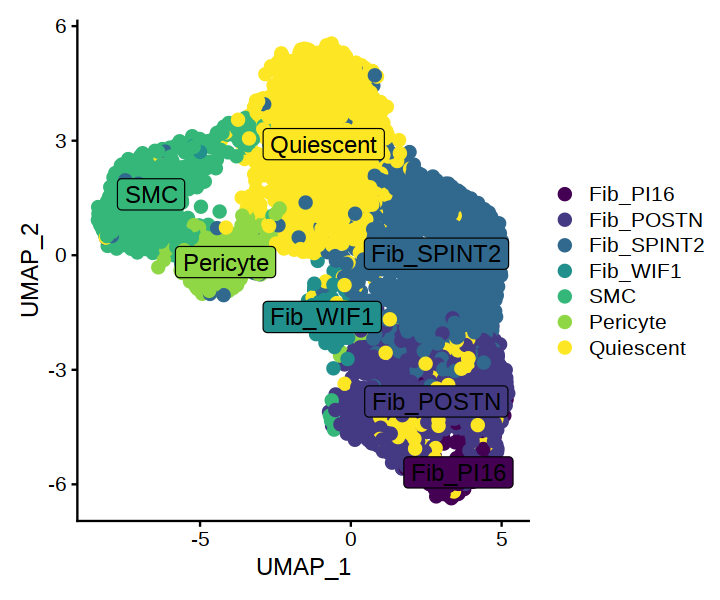

In [3]:
immune.cluster <- readRDS('fib_sm_pericyte2.rds')
immune.cluster@meta.data$fib_CellType[which(immune.cluster@meta.data$fib_CellType == 'Fib_MYH11')] <- 'Fib_COMP'
options(repr.plot.height = 5, repr.plot.width = 6)
ct.order <- c('Fib_PI16', 'Fib_POSTN', 'Fib_SPINT2', 'Fib_WIF1', 'SMC', 'Pericyte', 'Quiescent') 
immune.cluster@meta.data$fib_CellType <- factor(immune.cluster@meta.data$fib_CellType, levels = ct.order)
Idents(immune.cluster) <- 'fib_CellType'
DimPlot(immune.cluster, reduction = "umap", label = TRUE, label.size = 5, label.box = TRUE, raster = FALSE, cols = viridis(7, option = "D"), pt.size = 3)#+NoLegend()
# ggsave('./figures/Fib_Umap.pdf', width = 7, height = 5)

Idents(immune) <- 'celltype.res.0.1'
DimPlot(immune, reduction = "umap", label=TRUE, label.size=5,  cols = viridis(7, option = "D"), 
        label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) 

In [3]:
DefaultAssay(immune.cluster) <- "RNA"
Idents(immune.cluster) <- "fib_CellType"
markers <- FindAllMarkers(immune.cluster, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.csv(markers, file="SubCellType_Top_Genes.csv")

Calculating cluster Fib_PI16

Calculating cluster Fib_POSTN

Calculating cluster Fib_SPINT2

Calculating cluster Fib_COMP

Calculating cluster Smooth_muscle

Calculating cluster Pericyte

Calculating cluster quiescent



In [3]:
# --- Feature Plots
options(repr.plot.height = 8, repr.plot.width = 8)
# pdf('./figures/Group.pdf',width=12)
# DimPlot(
#   immune.cluster,
#   dims = c(1, 2),
#   cells = NULL,
#   cols = viridis(3, option = "D"),
#   pt.size = 2,
#   reduction = 'umap',
#   group.by = 'Cohort',
#   split.by = 'Group',
#   shape.by = NULL,
#   order = NULL,
#   shuffle = FALSE,
#   seed = 1,
#   label = FALSE,
#   label.size = 4,
#   label.color = "black",
#   label.box = TRUE, 
#   repel = TRUE,
#   cells.highlight = NULL,
#   cols.highlight = "#DE2D26",
#   sizes.highlight = 1,
#   na.value = "grey50",
#   ncol = NULL,
#   combine = TRUE,
#   raster = NULL,
#   raster.dpi = c(512, 512)
# )
# dev.off()
pdf('./figures/raw_features.pdf', width = 6, height = 5)
DefaultAssay(immune.cluster) <- "RNA"
FeaturePlot(immune.cluster, features=c("percent.mt", #ave_cEC
                                       "nFeature_RNA"
                                )) 
# FeaturePlot(immune.cluster, features=c( "nCount_RNA"), max.cutoff = 5000) 
dev.off()
# pdf('./figures/raw_features.pdf',width=15,height=10)
# DefaultAssay(immune.cluster) <- "RNA"
# FeaturePlot(immune.cluster, features=c("DCN","MYH11", "RGS5", "DES",
#                                       "SPINT2","POSTN","MFAP5")) 
# dev.off()

png 
  2

In [424]:
# # --- AverageHeatmap for Mrkers in each clusters
# options(repr.plot.height = 6, repr.plot.width = 5)
# Idents(immune.cluster) <- 'fib_CellType'
# immune.cluster@meta.data$fib_CellType <- factor(immune.cluster@meta.data$fib_CellType, levels = ct.order)
# markers <- FindAllMarkers(immune.cluster, assay = 'RNA', only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

# mrk.gene <- c('PI16', 'MFAP5', 'CXCL14', # 'Fib_PI16'
#                'POSTN', 'COL1A1', 'COL1A2',  # 'Fib_POSTN'
#                "SPINT2","FGFR4","GPC3", # 'Fib_SPINT2'
#                 'ASPN', 'COMP', 'WIF1',# 'Fib_MYH11'
#                'MYH11',  'DES', 'ACTA2', # 'Smooth_muscle'
#                'RGS5', 'COL4A1', 'COL4A2', # 'Pericyte'
#                'HLA-DPB1', 'GPX4',  'FTL', 'FTH1' # 'quiescent'
#               )

# pdf('./figures/HM_mrkgenes.pdf', width = 5, height= 6)
# averageHeatmap(object = immune.cluster, markerGene = mrk.gene, annoCol = TRUE, myanCol = viridis(7, option = "D"))
# dev.off()

# # --- HM：severarl pathway genes
# options(repr.plot.height = 6, repr.plot.width = 5)
# DefaultAssay(immune) <- 'AUC'
# Idents(immune) <- 'fib_CellType'

# mrk.path <- c('REACTOME-ALTERNATIVE-COMPLEMENT-ACTIVATION', 
#             'REACTOME-SYNTHESIS-OF-BILE-ACIDS-AND-BILE-SALTS-VIA-24-HYDROXYCHOLESTEROL', 
#             'REACTOME-MRNA-SPLICING', 
#             'REACTOME-REGULATION-OF-INSULIN-LIKE-GROWTH-FACTOR-IGF-TRANSPORT-AND-UPTAKE-BY-INSULIN-LIKE-GROWTH-FACTOR-BINDING-PROTEINS-IGFBPS', 
#             'REACTOME-COLLAGEN-FORMATION', 
#             'REACTOME-EXTRACELLULAR-MATRIX-ORGANIZATION', 
#             'REACTOME-MOLECULES-ASSOCIATED-WITH-ELASTIC-FIBRES', 
#             'REACTOME-INTEGRIN-CELL-SURFACE-INTERACTIONS', 
#             'REACTOME-CELL-CELL-COMMUNICATION',
#             'REACTOME-HSF1-ACTIVATION',
#             'REACTOME-ATTENUATION-PHASE', 
#             'REACTOME-METALLOTHIONEINS-BIND-METALS',  
#             'REACTOME-SMOOTH-MUSCLE-CONTRACTION', 
#             'REACTOME-RHO-GTPASES-ACTIVATE-ROCKS',
#             'REACTOME-CELL-EXTRACELLULAR-MATRIX-INTERACTIONS', 
#             'REACTOME-NOTCH3-INTRACELLULAR-DOMAIN-REGULATES-TRANSCRIPTION', 
#             'REACTOME-ELECTRIC-TRANSMISSION-ACROSS-GAP-JUNCTIONS',             
#             'REACTOME-TIGHT-JUNCTION-INTERACTIONS', 
#             'REACTOME-FCGR-ACTIVATION', 
#             'REACTOME-CELLULAR-RESPONSE-TO-STARVATION'
# )
# pdf('./figures/HM_Pathway_in_fibCT.pdf', width = 5, height = 6)
# averageHeatmap(object = immune, markerGene = mrk.path, assays = 'AUC', annoCol = TRUE, myanCol = viridis(7, option = "D"))
# dev.off()

In [332]:
# # # --- Add AUC datas
# # ssc <- readRDS("/share/home/qlab/projects/qlab_yrs/project_ssc/data/object/all/auc.rds")
# # immune[["AUC"]] <- CreateAssayObject(counts = Matrix(as.matrix(ssc[['AUC']][,rownames(immune@meta.data)], sparse = T)))

# immune.f <- subset(immune, Group == 'HC')
# DefaultAssay(immune.f) <- 'RNA'
# Idents(immune.f) <- 'fib_CellType'
# top.genes <- FindAllMarkers(immune.f, assay = 'RNA', only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# write.csv(top.genes, 'fib_CellType_topgenes.csv')

# DefaultAssay(immune.f) <- 'AUC'
# Idents(immune.f) <- 'fib_CellType'
# top.genes <- FindAllMarkers(immune.f, assay = 'AUC', only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001)
# write.csv(top.genes, 'fib_CellType_topaucs.csv')

`summarise()` has grouped output by 'SamNum'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'SamNum', 'Group'. You can override using the `.groups` argument.


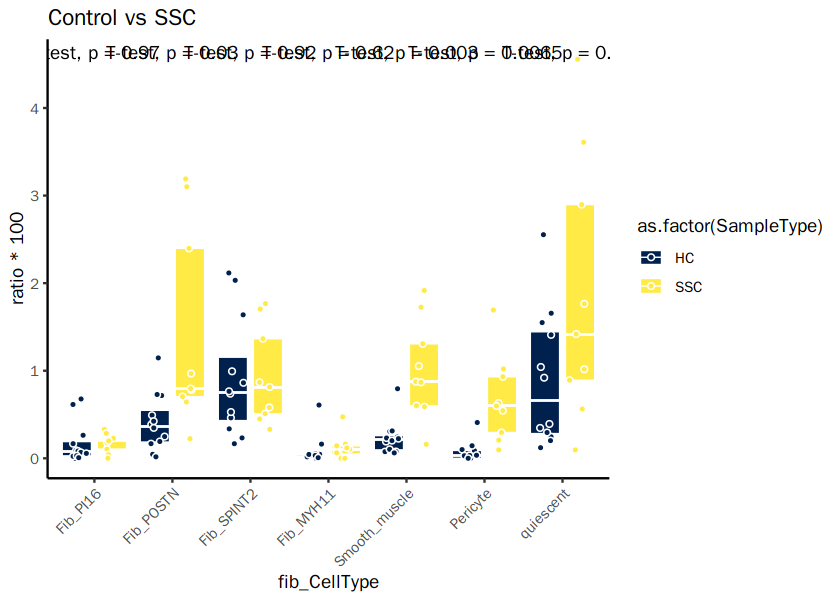

In [141]:
## 绘制 Control 和 SSC 样本中不同细胞类型的差异
# ssc <- readRDS("/share/home/qlab/projects/qlab_yrs/project_ssc/data/object/all/sam_df_anno_SSC.rds")
classifier  <- "Group"
metadata.df  <- immune.cluster@meta.data %>%
  tibble::rownames_to_column(var = "Cell")
cell_num.df  <- ssc@meta.data %>%
  dplyr::group_by(SamNum, !!sym(classifier)) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  dplyr::select(ID,total)

ratio.df  <- metadata.df %>%
  dplyr::group_by(SamNum,!!sym(classifier), fib_CellType) %>% #
  dplyr::summarise(sum = n()) %>%
  ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  tidyr::complete(nesting(SamNum, SampleType), fib_CellType, fill = list(sum = 0)) %>% #
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  left_join(cell_num.df, by = "ID") %>%
  rowwise() %>%
  dplyr::mutate(ratio = sum / total )

ratio.df$fib_CellType <- factor(ratio.df$fib_CellType, ct.order)
# colors.use  <- scales::viridis_pal()(3)[1:2]
colors.use  <- viridis(2, option = "E")
fig.size(5,7)
ggplot(ratio.df,aes(x = fib_CellType, y = ratio * 100, fill = as.factor(SampleType))) + #
  geom_boxplot(outlier.shape = NA, position=position_dodge(width=0.9), size = 0.5, colour = "#FFFFFF") +
  geom_point(pch = 21, position = position_jitterdodge(), colour = "white", size = 1.25) +
  #   geom_jitter( size = 0.6 , position=position_dodge(width=0.9),aes(group=SampleType, alpha = 0.6)) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Control vs SSC") +
  scale_fill_manual(values = colors.use)+
  stat_compare_means( label.x = 10, method = "t.test") 
ggsave('./figures/CellProp_SSCvsHC.pdf', width = 5, heigh = 4)

`summarise()` has grouped output by 'SamNum'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'SamNum', 'Group'. You can override using the `.groups` argument.


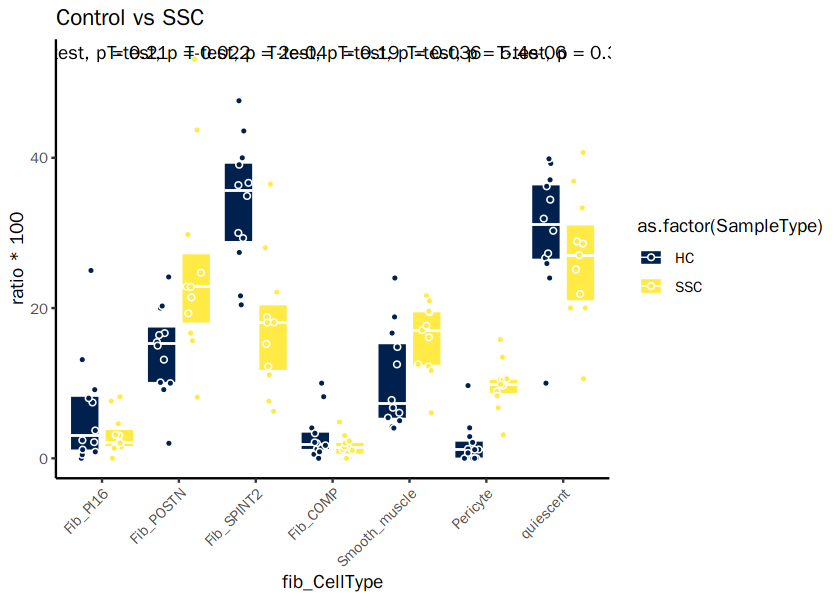

In [4]:
## 绘制 Control 和 SSC 样本中不同细胞类型的差异
# ssc <- readRDS("/share/home/qlab/projects/qlab_yrs/project_ssc/data/object/all/sam_df_anno_SSC.rds")
classifier  <- "Group"
metadata.df  <- immune.cluster@meta.data %>%
  tibble::rownames_to_column(var = "Cell")
cell_num.df  <- immune.cluster@meta.data %>%
  dplyr::group_by(SamNum, !!sym(classifier)) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  dplyr::select(ID,total)

ratio.df  <- metadata.df %>%
  dplyr::group_by(SamNum,!!sym(classifier), fib_CellType) %>% #
  dplyr::summarise(sum = n()) %>%
  ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  tidyr::complete(nesting(SamNum, SampleType), fib_CellType, fill = list(sum = 0)) %>% #
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  left_join(cell_num.df, by = "ID") %>%
  rowwise() %>%
  dplyr::mutate(ratio = sum / total )

ratio.df$fib_CellType <- factor(ratio.df$fib_CellType, ct.order)
# colors.use  <- scales::viridis_pal()(3)[1:2]
colors.use  <- viridis(2, option = "E")
fig.size(5,7)
ggplot(ratio.df,aes(x = fib_CellType, y = ratio * 100, fill = as.factor(SampleType))) + #
  geom_boxplot(outlier.shape = NA, position=position_dodge(width=0.9), size = 0.5, colour = "#FFFFFF") +
  geom_point(pch = 21, position = position_jitterdodge(), colour = "white", size = 1.25) +
  #   geom_jitter( size = 0.6 , position=position_dodge(width=0.9),aes(group=SampleType, alpha = 0.6)) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Control vs SSC") +
  scale_fill_manual(values = colors.use)+
  stat_compare_means( label.x = 10, method = "t.test") 
ggsave('./figures/CellProp_SSCvsHC.pdf', width = 5, heigh = 4)

In [26]:
# --- plot DEGs in each fib_CellType
immune.f0 <- subset(immune.cluster, Cohort %in% c('ev', 'paul'))
DefaultAssay(immune.f0) <- 'RNA'
data <- NULL
for(ct in ct.order){
    print(ct.order)
    immune.f <- subset(immune.f0, fib_CellType == ct)
    cell.ssc <- immune.f@meta.data %>% subset(Group == 'SSC') %>% rownames()
    cell.hc <- immune.f@meta.data %>% subset(Group == 'HC') %>% rownames()
    diff <- FindMarkers(immune.f, min.pct = 0.01, logfc.threshold = 0.2, ident.1 = cell.ssc, ident.2 = cell.hc) %>% rownames_to_column(var = "gene")
    diff$fib_CellType <- ct
    data <- rbind(data, diff)
}
data %>% mutate(Compare = 'SSc_VS_HC') %>%
write.csv('Figure4.e.csv', row.names = F)

# library(ggsci)
# diff.all <- data
# diff.all$sig <- 'no'
# diff.all$sig[which(diff.all$p_val_adj < 0.05 & diff.all$avg_log2FC > 0.5)] <- 'up'
# diff.all$sig[which(diff.all$p_val_adj < 0.05 & diff.all$avg_log2FC < -0.5)] <- 'down'
# diff.all$label <- ''
# diff.all$label[which(diff.all$sig %in% c('down', 'up'))] <- diff.all$gene[which(diff.all$sig %in% c('down', 'up'))] 
# diff.all$fib_CellType <- factor(diff.all$fib_CellType,
#                               levels = ct.order)

# dfcol<- data.frame(x = ct.order, y = 0, label = ct.order)
# dfcol$label <- factor(dfcol$label, levels = ct.order)
# mycol <- pal_d3("category20")(7)
# # --- Count DEGs numbers
# deg.num.df <- diff.all %>% dplyr::filter(sig %in% c('up', 'down')) %>% 
#                 group_by(fib_CellType, sig) %>% summarise(num = n()) %>%
#                 as.data.frame() %>% mutate(num_new = ifelse(sig == 'up', num, -num))
# # # --- set specifically displayed genes
# # hypoxia.rec.genesets <- c('ARNT', 'CA9', 'CREBBP', 'EP300', 'EPAS1', 'EPO', 'HIF1A', 'ELOC', 'ELOB', 'VEGFA', 
# #                           'VHL','CUL2', 'RBX1', 'CITED2', 'HIGD1A', 'HIF1AN', 'HIF3A', 'EGLN2', 'EGLN3')
# # diff.all$label_hypo <-''
# # diff.all$label_hypo[which(diff.all$gene %in% hypoxia.rec.genesets)] <- diff.all$gene[which(diff.all$gene %in% hypoxia.rec.genesets)]
# # diff.all$label_hypo[which(diff.all$sig == 'no')] <- ''

# # O2_CO2.rec.genesets <- c('AQP1', 'CA1', 'CA2', 'CA4', 'HBA2', 'HBB', 'RHAG', 'SLC4A1')
# # diff.all$label_o2 <-''
# # diff.all$label_o2[which(diff.all$gene %in% O2_CO2.rec.genesets)] <- diff.all$gene[which(diff.all$gene %in% O2_CO2.rec.genesets)]
# # diff.all$label_o2[which(diff.all$sig == 'no')] <- ''

# options(repr.plot.height = 6, repr.plot.width = 12)
# diff.all$sig = factor(diff.all$sig, levels = c('down', 'no', 'up'))
# p1<-ggplot()+
#     # --- plot total degs
#     # geom_bar(data= deg.num.df, aes(x = fib_CellType, y = num_new/100), stat="identity", fill = 'grey', alpha = 0.5) + 
#     # geom_text(data= deg.num.df, aes(x = fib_CellType, y = num_new/100, label = num), vjust = -0.5)+
#     # --- plot dot
#     geom_jitter(data = diff.all %>% dplyr::filter(sig == "no"), 
#                 aes(x = fib_CellType, y = avg_log2FC, color = sig), size = 1, width = 0.4, alpha = 0.5) +
#     geom_jitter(data = diff.all %>% dplyr::filter(sig %in% c('down', 'up')), # %>% dplyr::filter(label_hypo == '' & label_o2 == ''), 
#                 aes(x = fib_CellType, y = avg_log2FC, color = sig), size = 1.5, width = 0.4, alpha = 0.5) +  
#     # geom_jitter(data = diff.all %>% dplyr::filter(label_hypo != ''), 
#     #             aes(x = fib_CellType, y = avg_log2FC), size = 2, stroke = 0.5, shape = 21, color = 'black', fill = '#6B8770', width = 0.4, alpha = 0.75) +
#     # geom_jitter(data = diff.all %>% dplyr::filter(label_o2 != ''), 
#     #             aes(x = fib_CellType, y = avg_log2FC), size = 2, stroke = 0.5, shape = 21, color = 'black', fill = 'orange', width = 0.4, alpha = 0.75) +
#     scale_color_manual(values = c("grey","#184995","#B17AA1")) +
#     # --- plot label
#     geom_text_repel(data = diff.all, #%>% dplyr::filter(label_hypo == '' & label_o2 == ''), 
#                     aes(x = fib_CellType, y = avg_log2FC, label=label, color = sig), 
#                     size = 3, force = 0.5, max.overlaps = 15) +
#     # geom_text(data = diff.all %>% dplyr::filter(label_hypo != ''), 
#     #                 aes(x = fib_CellType, y = avg_log2FC, label=label_hypo), 
#     #                 size = 3, color = 'black', force = 0.5, max.overlaps = 15
#     #                )+
#     # geom_text(data = diff.all %>% dplyr::filter(label_o2 != ''), 
#     #                 aes(x = fib_CellType, y = avg_log2FC, label=label_o2),
#     #                 size = 3, color = 'black', force = 0.5, max.overlaps = 15, 
#     #                 arrow = arrow(length = unit(0.008, "npc"), type = "open", ends = "last")
#     #                )+
#     geom_tile(data = dfcol, aes(x=x, y=y), height=0.5, color = "black", fill = mycol, alpha = 0.8, show.legend = F) +
#     geom_text(data = dfcol, aes(x=x, y=y,label=x), size = 5 , color ="black") +
#     labs(x="fib_CellType", y="avg_log2FC") +
#     # scale_y_continuous(sec.axis = sec_axis(~.*100, name = 'number of sigDEGs')) +
#     theme_bw() +  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 6)) +
#     ggtitle('SSC VS HC in each fib_CellType') 
# # ggsave('./figures/DEGs_in_fibCellType.pdf', width = 8, heigh = 5)

# p2<-ggplot() + 
# geom_bar(data= deg.num.df, aes(x = fib_CellType, y = num,  fill = sig), stat="summary", fun='mean', position = position_dodge(), alpha = 0.5) +
# scale_fill_manual(values = c("#184995", "#B17AA1")) +
# theme_classic()
# # ggsave('./figures/DEGsNumber_in_fibCellType.pdf', width = 7, heigh = 5)

[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 
[1] "Fib_PI16"   "Fib_POSTN"  "Fib_SPINT2" "Fib_WIF1"   "SMC"       
[6] "Pericyte"   "Quiescent" 


In [44]:
immune.f <- immune.cluster %>% subset(fib_CellType %in% c('Pericyte', 'Smooth_muscle'))
DefaultAssay(immune.f) <- 'RNA'
Idents(immune.f)<-"fib_CellType"
# VlnPlot(immune.f, cols = viridis(2, option = "G"),
#         features = c("FLNA",'LPP'),
#         slot = "data",stack=TRUE, flip = T, adjust = 2)
pdf('./figures/VlnPlot_SM_Pericyte.pdf', width = 5, height = 3)
VlnPlot(immune.f, features =c("FLNA",'LPP'), stack = TRUE, assay = 'RNA', flip = T, adjust = 2, # CellFeatures:"IL1R1", "POSTN", "CXCL12", "FCN3", "EDNRB"
        cols =  c("#184995","#B17AA1"), split.by = 'Group', group.by = 'fib_CellType') +
  stat_summary(fun = mean, geom='point', size = 10, colour = "black", shape = 95, position =  position_dodge(width = 0.9)) +
  stat_compare_means( label.y = 3, method = "t.test")
dev.off()

png 
  2

In [56]:
# Enriched Pathway in SSC of each EC_CellType
diff.all <- data
# pdf('./figures/upDEGs_Reactome.pdf', width =12, height =6)
for(i in seq_along(ct.order)){
    c1.gene = diff.all %>% dplyr::filter(p_val < 0.05 & avg_log2FC > 0 & fib_CellType == ct.order[i]) %>% 
            arrange(-avg_log2FC) %>% pull(gene) %>% .[1:200]
    geneset  <- biosets[['REACTOME']]
    if(length(geneset$genesets[duplicated(geneset$genesets)]) >0){geneset$genesets <- geneset$genesets[!duplicated(geneset$genesets)]}
    hyp_obj <- hypeR(c1.gene, geneset,test="hypergeometric", background=30000)
    hyp_obj$data$label <- str_replace(hyp_obj$data$label, 'REACTOME_', '')
    
    pdf(paste0('./figures/ct_reactome/', ct.order[i], '_plot.pdf'), width = 4, height = 6)
    p.plot <- hyp_obj$data %>% dplyr::filter(fdr < 0.01 & pval < 0.05 & overlap > 9) %>% 
            mutate(pathway = fct_reorder(label, -fdr), GeneNum = overlap) %>%
            ggplot(aes(x = -log(pval), y = pathway)) +
                geom_point(aes(size = GeneNum, color = -log(fdr))) +
                scale_color_gradient(low="#136885",high = "#FAB35B") +
                theme_bw() + labs(color = "-Log(FDR)") +
                ggtitle(paste0(gsub("(\\D)(\\D+)", "\\U\\1\\L\\2", ct.order[i], perl = TRUE),': enriched Reactome pathways')) + 
                theme(axis.text.y = element_blank())
    print(p.plot)
    dev.off()
        
    pdf(paste0('./figures/ct_reactome/', ct.order[i], '_yaxis.pdf'), width = 12, height = 6)        
    p.y <- hyp_obj$data %>% dplyr::filter(fdr < 0.01 & pval < 0.05 & overlap > 9) %>% 
            mutate(pathway = fct_reorder(label, -fdr), GeneNum = overlap) %>%
            ggplot(aes(x = -log(pval), y = pathway)) +
                geom_point(aes(size = GeneNum, color = -log(fdr))) +
                scale_color_gradient(low="#136885",high = "#FAB35B") +
                theme_bw() + labs(color = "-Log(FDR)") +
                ggtitle(paste0(gsub("(\\D)(\\D+)", "\\U\\1\\L\\2", ct.order[i], perl = TRUE),': enriched Reactome pathways')) 
    print(p.y)
    dev.off()
}
# dev.off()

In [266]:
# # --- AUC for each fib_CellType
# immune.cluster <- subset(immune, Cohort %in% c('ev', 'paul'))
# data <- NULL
# for(ct in unique(immune.cluster@meta.data$fib_CellType)){
#     immune.f <- subset(immune.cluster, fib_CellType == ct)
#     DefaultAssay(immune.f) <- 'AUC'
#     cell.ssc <- immune.f@meta.data %>% subset(Group == 'SSC') %>% rownames()
#     cell.hc <- immune.f@meta.data %>% subset(Group == 'HC') %>% rownames()
#     diff <- FindMarkers(immune.f, min.pct = 0.01, logfc.threshold = 0.2, ident.1 = cell.ssc, ident.2 = cell.hc, pseudocount.use = 0.001) %>% rownames_to_column(var = "gene")
#     diff$fib_CellType <- ct
#     data <- rbind(data, diff)
# }
# write.csv(data, 'fib_CellType_topaucs.csv')

In [201]:
# --- monocle plot
# library(monocle3)
cds <- readRDS('./monocle.rds')
cds@colData@listData$fib_CellType[which(cds@colData@listData$fib_CellType == 'Fib_MYH11')] <- 'Fib_COMP'
cds@colData@listData$fib_CellType <- factor(cds@colData@listData$fib_CellType , levels =  c('Fib_PI16', 'Fib_POSTN', 'Fib_SPINT2', 'Fib_COMP', 'Fib_SPINT2_Y1') )
pdf('./figures/monocle.pdf', width = 6, height = 5)
plot_cells(
  cds,
  x = 1,
  y = 2,
  reduction_method = "UMAP",
  color_cells_by = "fib_CellType",
  # group_cells_by = "CellType",
  genes = NULL,
  show_trajectory_graph = TRUE,
  trajectory_graph_color = "grey28",
  trajectory_graph_segment_size = 0.75,
  norm_method = c("log", "size_only"),
  label_cell_groups = FALSE, #TRUE:在图上标注出各个细胞群的名字，FALSE：以图例的形式标注出细胞群的名字。
  label_groups_by_cluster = TRUE, #是否将细胞群的名字标注在每个细胞群落的中心
  group_label_size = 1, #细胞群落名字的标签大小
  labels_per_group = 1,
  label_branch_points = FALSE,#标注出每一个节点的编号：黑色的圆圈显示
  label_roots = TRUE,#标注出每一个根的标号
  label_leaves = TRUE,#标注出每一个细胞群的编号，灰色的圆圈显示
  graph_label_size = 3,#标注的大小
  cell_size = 1,
  # cell_stroke = I(cell_size/2),
  alpha = 0.8,
  min_expr = 0.1,
  rasterize = TRUE,
  scale_to_range = TRUE,
  label_principal_points = TRUE #标注出分支的名字，方便后续选取分支进行深入分析
) + scale_colour_manual(values = viridis_pal()(5))  # aesthetics = c("colour", "fill")
dev.off()

This graph was created by an old(er) igraph version.
  Call upgrade_graph() on it to use with the current igraph version
  For now we convert it on the fly...



png 
  2

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


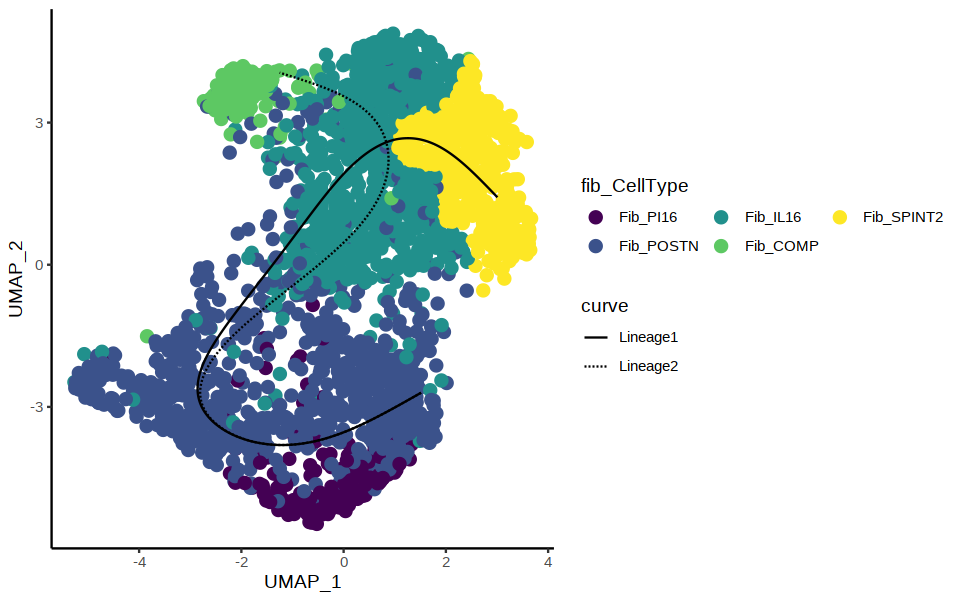

In [7]:
immune <- readRDS('fibroblast.rds')
immune@meta.data$fib_CellType[which(immune@meta.data$fib_CellType == 'Fib_MYH11')] <- 'Fib_COMP'
options(repr.plot.height = 5, repr.plot.width = 8)
immune@meta.data$fib_CellType <- factor(immune@meta.data$fib_CellType , levels =  c('Fib_PI16', 'Fib_POSTN', 'Fib_IL16', 'Fib_COMP', 'Fib_SPINT2') )
# pdf('./figures/Slingshot.pdf',width=8,heigh = 5)
plotPseudoTime(immune, group.by = "fib_CellType", reduction = "umap",dims = 1:2, pt.size=3, pt.alpha = 1,
               colors = viridis(5, option = "D")) + theme_classic() 
# dev.off()

In [90]:
# --- plot DETFs in each fib_CellType
immune.f0 <- subset(immune, Cohort %in% c('ev', 'paul'))
data <- NULL
ct.list <- c('Fib_PI16', 'Fib_POSTN', 'Fib_IL16', 'Fib_COMP', 'Fib_SPINT2')
for(ct in ct.list){
    immune.f <- subset(immune.f0, fib_CellType == ct)
    DefaultAssay(immune.f) <- 'TF'
    cell.ssc <- immune.f@meta.data %>% subset(Group == 'SSC') %>% rownames()
    cell.hc <- immune.f@meta.data %>% subset(Group == 'HC') %>% rownames()
    diff <- FindMarkers(immune.f, min.pct = 0.01, ident.1 = cell.ssc, ident.2 = cell.hc, pseudocount.use = 0.001) %>% rownames_to_column(var = "gene")
    diff$fib_CellType <- ct
    data <- rbind(data, diff)
}
write.csv(data, 'DETFs_fibroblast.csv')

In [9]:
# # --- DETFs: FindMarkers
# cell.ssc <- immune@meta.data %>% subset(Group == 'SSC') %>% rownames()
# cell.hc <- immune@meta.data %>% subset(Group == 'HC') %>% rownames()
# DefaultAssay(immune) <- 'TF'
# diff <- FindMarkers(immune, min.pct = 0.01,  pseudocount.use = 0.001, ident.1 = cell.ssc, ident.2 = cell.hc) %>% rownames_to_column(var = "TFs")
# diff %>% mutate(Compare = 'SSc_VS_HC') %>% write.csv('Figure4.n.csv', row.names = F)
# # --- plot
# logFC <- diff$avg_log2FC
# padj <- diff$p_val_adj
# label <- diff$TFs
# data <- data.frame(logFC=logFC,padj=padj, label=label)
# data$padj[data$padj == 0] <- 1e-300
# data$sig[(data$padj > 0.05|data$padj=="NA")|(data$logFC < 0.5) & data$logFC > -0.5] <- "no"
# data$sig[data$padj <= 0.05 & data$logFC >= 0.5] <- "up"
# data$sig[data$padj <= 0.05 & data$logFC <= -0.5] <- "down"
# data$label[which(data$sig == 'no')] <- ''

# options(repr.plot.height = 8, repr.plot.width = 8)
# ggplot(data,aes(logFC,-1*log10(padj),color = sig))+ 
#     geom_point()+
#     labs(x="log2FC",y="-log10(P-Value)")+
#     scale_color_manual(values =c("#184995","grey","#B17AA1"))+  
#     geom_hline(yintercept=-log10(0.05),linetype=4)+
#     geom_vline(xintercept=c(-0.5,0.5),linetype=4)+ 
#     geom_text_repel(label=data$label,size = 5, max.overlaps = 20)+
#     theme_bw() +
#     ggtitle('SSC vs HC: Different Expression TFs in Fibroblast')
# ggsave('./figures/TFs_fbro_Volcano.pdf', width = 6, height = 6)

Warning message:
“Removed 168 rows containing non-finite outside the scale range (`stat_density()`).”
Warning message:
“Removed 357 rows containing non-finite outside the scale range (`stat_density()`).”


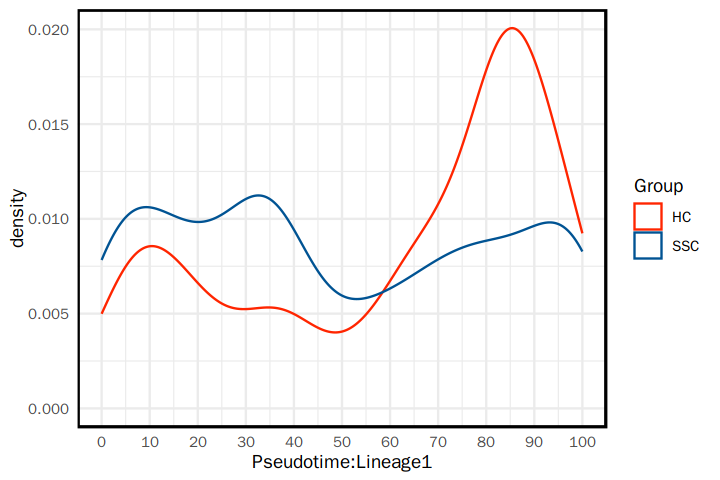

Warning message:
“Removed 168 rows containing missing values or values outside the scale range (`geom_point()`).”


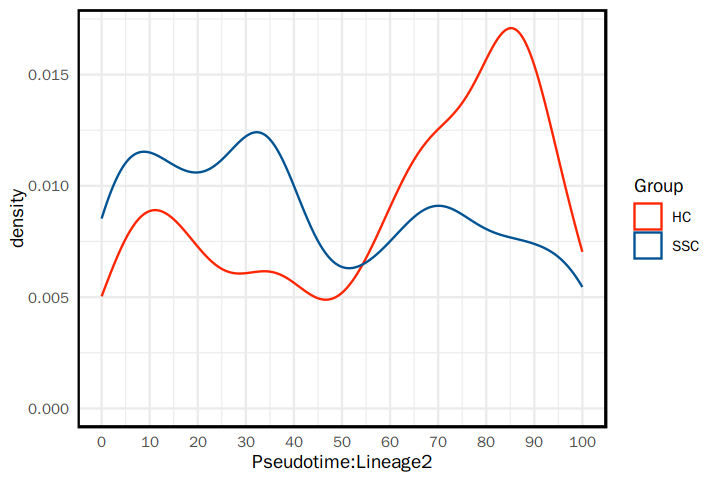

Warning message:
“Removed 168 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 357 rows containing missing values or values outside the scale range (`geom_point()`).”


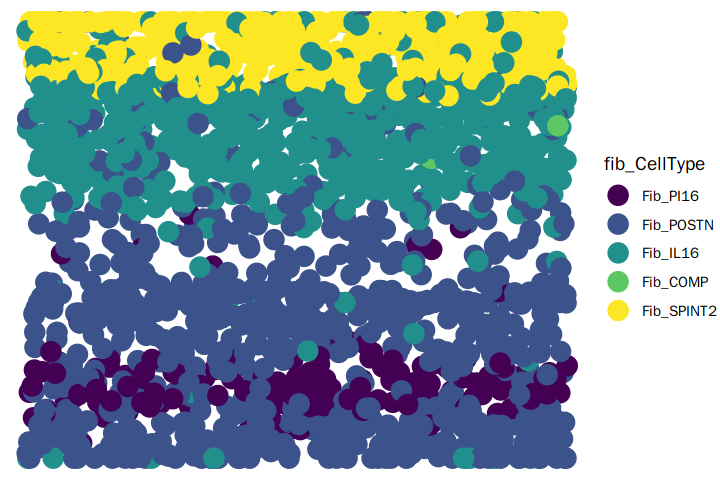

Warning message:
“Removed 357 rows containing missing values or values outside the scale range (`geom_point()`).”


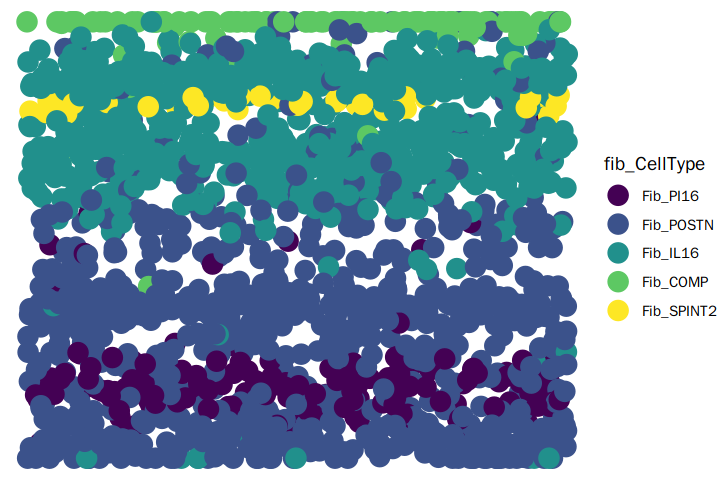

In [219]:
# --- CellDensity along Lineages
meta.data <- immune@meta.data
colors.use  <- c("#ff2500","#005393")
options(repr.plot.height = 4, repr.plot.width = 6)
for(cv in c("Lineage1","Lineage2"
           )) {
  cv_pct  <- paste0(cv,"_pct")
  # cv_pct_p<- paste0(cv,"_pct_p")
  # pdf(paste0("./",cv,"_treat_pct.pdf"))
  cv_pct_p <- ggplot(meta.data, aes(x = !!sym(cv_pct), color = Group)) + #sym 中是metadata里 curve那一列colnames的名字，color中是我们准备分的组的colnames
    geom_density() +
    #facet_wrap(~Group) +#～后面跟的是注释信息
    theme_minimal() +
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1)) +
    #ylim(c(0,0.1)) +
    xlab(paste0("Pseudotime:",cv)) +
    scale_colour_manual(values = colors.use) +
    scale_x_continuous(breaks=seq(0, 100, 10)) 
  # ggsave(paste0(#"/share/home/qlab/projects/qlab_yrs/project_ssc/result/Umap/SSC_Combine/lbc_cc/",
  #               cv,"_ss.pdf"), width = 4.25, heigh = 2)
    print(cv_pct_p)
    # dev.off()
}

ggplot(immune@meta.data)+geom_point(mapping=aes(x=1, y=Lineage1_pct, color= fib_CellType), position='jitter', size = 5) +
scale_color_manual(values = viridis(5, option = "D")) +
theme_void()
ggsave('./figures/l1_legend.pdf',width=3,heigh =15)
ggplot(immune@meta.data)+geom_point(mapping=aes(x=1,y=Lineage2_pct,colour= fib_CellType),position='jitter', size = 5) +
scale_color_manual(values = viridis(5, option = "D")) +
theme_void()
ggsave('./figures/l2_legend.pdf',width=3,heigh =15)

In [25]:
# # --- TradeSeq gene ranks plot
# library(tradeSeq)
# library(RColorBrewer)
# library(SingleCellExperiment)
# library(magrittr)
# library(slingshot)
# library(mclust, quietly = TRUE)
# library(mgcv)
# sce1 <- readRDS('l1_tradeseq.rds')
# condRes1 <- conditionTest(sce1, l2fc = log2(1.5))
# data <- condRes1 %>% rownames_to_column(var='gene')
# data <- filter(data, pvalue < 0.05) 
# data$pvalue[which(data$pvalue == 0.000000e+00)] <- 1.0e-16
# data <- data[order(-data[,2]),]
# data$`Rank_by_waldStat` <- 1:length(data[,2])
# data.l1 <- data %>% mutate(Lineage = 'L1:Fib_SPINT2')
# ggplot(data) + 
#     geom_point(mapping=aes(x = Rank_by_waldStat, y = waldStat, colour = (-log10(pvalue)))) + 
#     geom_text_repel(label=data$gene,x=data$Rank_by_waldStat, y = data$waldStat) +
#     scale_color_viridis(begin=1,end=0,option="A") +
#     theme_bw()
# # ggsave('./figures/conRes1.pdf',width=8,heigh = 5)

# sce2 <- readRDS('l2_tradeseq.rds')
# condRes2 <- conditionTest(sce2, l2fc = log2(1.5))
# data <- condRes2 %>% rownames_to_column(var='gene')
# data <- filter(data, pvalue < 0.05) 
# data$pvalue[which(data$pvalue == 0.000000e+00)] <- 1.0e-16
# data <- data[order(-data[,2]),]
# data$`Rank_by_waldStat` <- 1:length(data[,2])
# data.l2 <- data %>% mutate(Lineage = 'L1:Fib_WIF1')
# ggplot(data) + 
#     geom_point(mapping=aes(x = Rank_by_waldStat, y = waldStat, colour = (-log10(pvalue)))) + 
#     geom_text_repel(label=data$gene,x=data$Rank_by_waldStat, y = data$waldStat) +
#     scale_color_viridis(begin=1,end=0,option="A") +
#     theme_bw()
# # ggsave('./figures/conRes2.pdf',width=8,heigh = 5)

# rbind(data.l1,data.l2) %>% write.csv('Figure4.k.csv', row.names=F)

In [17]:
# # --- Lineage1
# pseu.l <- immune.cluster %>% subset(Cohort != 'jxue') %>% subset(Lineage1 != 'NA')
# DefaultAssay(pseu.l) <- 'RNA'
# Idents(pseu.l) <- 'Group'
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l1_RNA.csv')


# DefaultAssay(pseu.l) <- 'TF'
# Idents(pseu.l) <- 'Group'
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l1_TF.csv')

# DefaultAssay(pseu.l) <- 'AUC'
# Idents(pseu.l) <- "Group"
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l1_AUC.csv')

# # --- Lineage2
# pseu.l <- immune.cluster %>% subset(Cohort != 'jxue') %>% subset(Lineage2 != 'NA')
# DefaultAssay(pseu.l) <- 'RNA'
# Idents(pseu.l) <- 'Group'
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l2_RNA.csv')


# DefaultAssay(pseu.l) <- 'TF'
# Idents(pseu.l) <- 'Group'
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l2_TF.csv')

# DefaultAssay(pseu.l) <- 'AUC'
# Idents(pseu.l) <- "Group"
# ssc_markers <- FindMarkers(pseu.l, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './l2_AUC.csv')

In [239]:
# # --- Fib_POSTN
# immune.f <- immune %>% subset(fib_CellType == 'Fib_POSTN') %>% subset(Cohort != 'jxue') 
# DefaultAssay(immune.f) <- 'RNA'
# Idents(immune.f) <- 'Group'
# ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './FibPOSTN_RNA.csv')


# DefaultAssay(immune.f) <- 'TF'
# Idents(immune.f) <- 'Group'
# ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './FibPOSTN_TF.csv')

# DefaultAssay(immune.f) <- 'AUC'
# Idents(immune.f) <- "Group"
# ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
#                       ident.1 = 'SSC', ident.2 ='HC')
# write.csv(ssc_markers, './FibPOSTN_AUC.csv')

In [255]:
# --- Fib_SPINT2
immune.f <- immune %>% subset(fib_CellType == 'Fib_SPINT2') %>% subset(Cohort != 'jxue') 
DefaultAssay(immune.f) <- 'RNA'
Idents(immune.f) <- 'Group'
ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25,
                      ident.1 = 'SSC', ident.2 ='HC')
write.csv(ssc_markers, './FibSPINT2_RNA.csv')


DefaultAssay(immune.f) <- 'TF'
Idents(immune.f) <- 'Group'
ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
                      ident.1 = 'SSC', ident.2 ='HC')
write.csv(ssc_markers, './FibSPINT2_TF.csv')

DefaultAssay(immune.f) <- 'AUC'
Idents(immune.f) <- "Group"
ssc_markers <- FindMarkers(immune.f, min.pct = 0.25, logfc.threshold = 0.25, pseudocount.use = 0.001,
                      ident.1 = 'SSC', ident.2 ='HC')
write.csv(ssc_markers, './FibSPINT2_AUC.csv')

In [33]:
# --- HM：severarl pathway genes
options(repr.plot.height = 12, repr.plot.width = 8)
DefaultAssay(immune.cluster) <- 'RNA'
immune.cluster@meta.data$hm_group <- paste0(immune.cluster@meta.data$Group, '|', immune.cluster@meta.data$fib_CellType)
Idents(immune.cluster) <- 'hm_group'
immune.cluster@meta.data$hm_group <- factor(immune.cluster@meta.data$hm_group,
                                              levels = c('HC|Fib_PI16', 'SSC|Fib_PI16',
                                                         'HC|Fib_POSTN', 'SSC|Fib_POSTN',
                                                         'HC|Fib_SPINT2', 'SSC|Fib_SPINT2', 
                                                         'HC|Fib_COMP', 'SSC|Fib_COMP', 
                                                         'HC|Smooth_muscle', 'SSC|Smooth_muscle',
                                                         'HC|Pericyte', 'SSC|Pericyte',
                                                         'HC|quiescent', 'SSC|quiescent'))

ecm.genes <- c('POSTN', 'CTHRC1', 'SPARC', 'THY1', 'TPM2')
col.genes <- c('COL1A1',  'COL1A2', 'COL3A1',  'COL5A1', 'COL14A1', 'COL8A1', 'COL2A1','COL4A1')
ifm.genes <- c('CXCL12','CXCL10', 'IL32','IL1B', 'CCL3','CCL4','CCL5') # inflammatory
atg.genes <- c('B2M', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-DRA', 'HLA-DRB1')
hypo.genes <- c( "LDHA", "ENO1", 'TPI1', "PGAM1", 'MIF') 
death.genes <- c('BCAP31', 'BAX', 'HMGB1')
sene.genes <- c('CDKN2C', 'CDKN1B')
mrk.genes <- c(ecm.genes, col.genes, ifm.genes, atg.genes, hypo.genes, death.genes, sene.genes) %>% unique()

sam.avg <- AverageExpression(immune.cluster, assays = 'RNA', group.by = 'hm_group')
hm.df <- sam.avg$RNA %>% t() %>% as.data.frame() %>% .[, mrk.genes] %>% scale(scale = TRUE, center = TRUE)

info <- immune.cluster@meta.data[, c('hm_group', 'Group', 'fib_CellType')] %>% unique() %>% {rownames(.) <- NULL; .} %>% column_to_rownames(var = 'hm_group') 

ann_colors=list(fib_CellType = c(`Fib_PI16` = '#FDE725FF', `Fib_POSTN` = '#440154FF', Fib_SPINT2 = '#2A788EFF',  `Fib_COMP` = '#22A884FF', 
                                Smooth_muscle = '#414487FF', Pericyte = '#7AD151FF', quiescent = 'black'),
                Group = c(SSC = "#B17AA1", HC = "#184995"))
ct.list <- c('HC|Fib_PI16', 'SSC|Fib_PI16',
             'HC|Fib_POSTN', 'SSC|Fib_POSTN',
             'HC|Fib_SPINT2', 'SSC|Fib_SPINT2', 
             'HC|Fib_COMP', 'SSC|Fib_COMP', 
             'HC|Smooth_muscle', 'SSC|Smooth_muscle',
             'HC|Pericyte', 'SSC|Pericyte',
             'HC|quiescent', 'SSC|quiescent')
pdf('./figures/HM_GeneExp_in_Groups.pdf', width = 10, height = 10)
hm <- pheatmap(hm.df[ct.list,] %>% t(), cluster_row = FALSE, cluster_col = FALSE, 
            color = c(colorRampPalette(colors = c("darkblue","white"))(50),colorRampPalette(colors = c("white", "red"))(50)), 
            main = ("Scale_Express"),
             annotation_col = info[,c('fib_CellType','Group')],
             annotation_colors = ann_colors,
             gaps_row = c(
                        length(ecm.genes),
                        length(ecm.genes) + length(col.genes), 
                        length(c(ecm.genes, col.genes)) + length(ifm.genes),
                        length(c(ecm.genes, col.genes, ifm.genes)) + length(atg.genes),
                        length(c(ecm.genes, col.genes, ifm.genes, atg.genes)) + length(hypo.genes),
                        length(c(ecm.genes, col.genes, ifm.genes, atg.genes, hypo.genes)) + length(death.genes),
                        length(c(ecm.genes, col.genes, ifm.genes, atg.genes, hypo.genes, death.genes)) + length(sene.genes)),
                        # length(c(ecm.genes, col.genes, ifm.genes))+length(death.genes)),
            gaps_col = c(2,4,6,8,10,12)
            ) 
print(hm)
dev.off()

Warning message:
“Column annotation has different order from matrix columns. Adjust the
column annotation based on column names of the matrix.”


png 
  2

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3675 rows containing non-finite outside the scale range (`stat_smooth()`).”


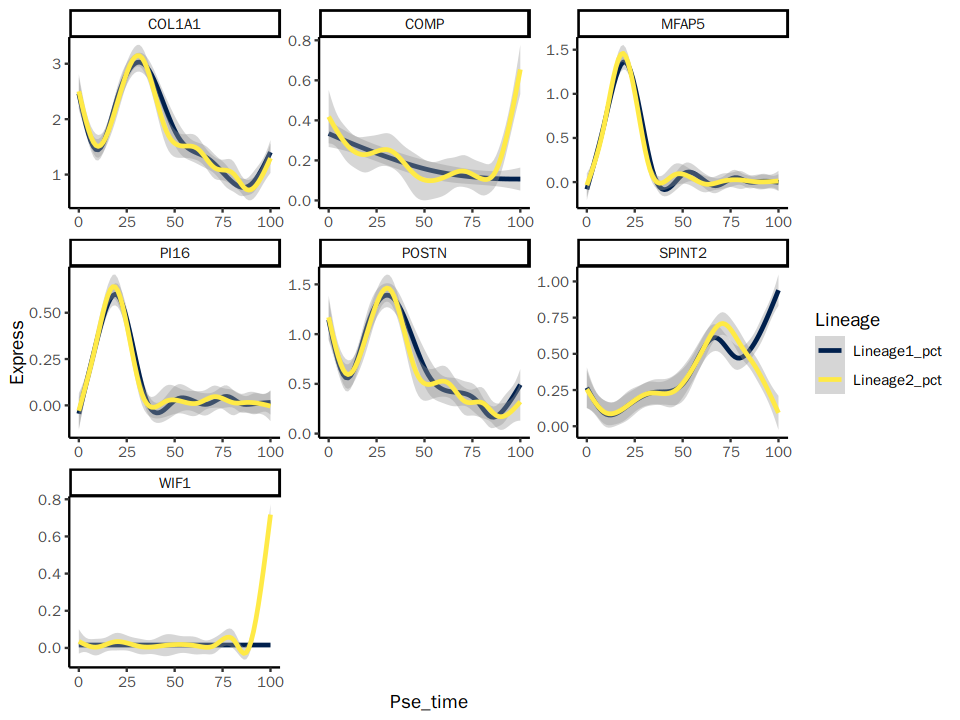

In [57]:
# --- plot gene expression along trajectory
metadata <- immune@meta.data %>% tibble::rownames_to_column(var='Cell') %>% 
                .[,c('Cell','Group','Lineage1_pct','Lineage2_pct')]

options(repr.plot.height = 6, repr.plot.width = 8)
genes <- c('PI16','POSTN','WIF1','SPINT2', "MFAP5", "COMP", "COL1A1") 
# 保留：'FCN1'：monocyte
    #  'FCGR3A'： CD16
    #  'FABP4'：Ave_Mac
    # 'SEPP1‘：M2
gene.seurat <- immune[['RNA']]@data[genes,] %>% as.matrix() %>%
                                        t() %>% as.data.frame() %>% 
                                        tibble::rownames_to_column(var='Cell') %>%
                                        left_join(metadata, by='Cell')

data.seurat <- gene.seurat %>% 
    pivot_longer(!c(Cell,'PI16','POSTN','WIF1','SPINT2',  "MFAP5", "COMP", "COL1A1", Group), names_to = 'Lineage', values_to = 'Pse_time') %>%
    pivot_longer(!c(Cell,Group,Lineage,Pse_time), names_to = 'Gene', values_to = 'Express')

ggplot(data = data.seurat, aes(x=Pse_time, y=Express, group = Lineage, color=Lineage))+ 
  geom_smooth()+
  scale_colour_manual(values = viridis(2, option = "E"))+
  theme_classic()+
  facet_wrap(~Gene, nrow=3, scales = 'free')
# ggsave('./figures/RNA_Lineage.pdf', width = 6, height = 4)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1512 rows containing non-finite outside the scale range (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1512 rows containing non-finite outside the scale range (`stat_smooth()`).”


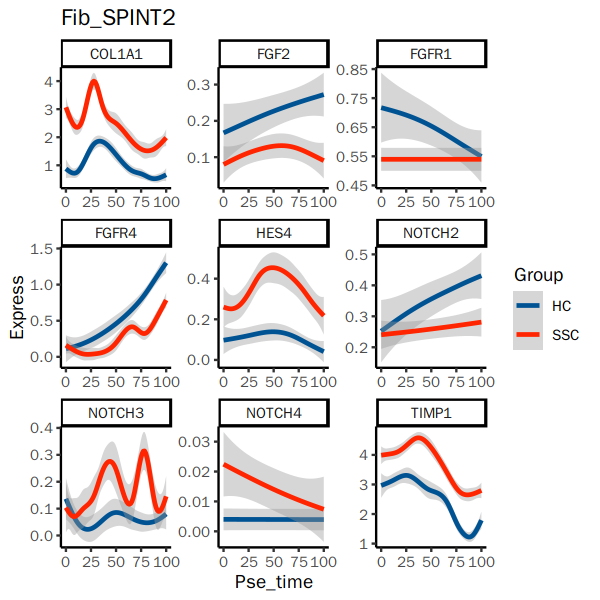

In [15]:
# --- Plot gene expression along Lineage1:RNA TFs, AUCs.
options(repr.plot.height = 5, repr.plot.width = 5)
pseu.l <- subset(immune, Lineage1 != 'NA')
metadata <- pseu.l@meta.data %>% tibble::rownames_to_column(var='Cell') %>% 
                .[,c('Cell','Group','Lineage1_pct')]

genes <- c('FGF2', 'FGFR1', 'FGFR4', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'COL1A1', 'HES4', 'TIMP1')
gene.seurat <- immune[['RNA']]@data[genes,] %>% 
                                    as.matrix() %>%
                                    t() %>% 
                                    as.data.frame() %>% 
                                    tibble::rownames_to_column(var='Cell') %>% 
                                    left_join(metadata, by = 'Cell')  %>% 
                                    pivot_longer(!c(Cell, genes,Group), names_to = 'Lineage', values_to = 'Pse_time') %>%
                                    pivot_longer(!c(Cell,Group,Lineage,Pse_time), names_to = 'Gene', values_to = 'Express')
ggplot(data = gene.seurat, aes(x=Pse_time, y=Express, group = Group, color=Group))+  #, linetype = Group
  geom_smooth()+
  scale_colour_manual(values = c("#005393","#ff2500"))+
  theme_classic()+
  facet_wrap(~Gene, nrow=3, scales = 'free') +
  ggtitle('Fib_SPINT2')
ggsave('./figures/L1_RNA.pdf',width = 6, height = 5)

# tfs <- c('TEAD2', 'GLI1', 'GATA4', 'SOX4', 'TWIST1', 'STAT1')
# tf.seurat <- immune[['TF']]@data[tfs,] %>% 
#                                     as.matrix() %>%
#                                     t() %>% 
#                                     as.data.frame() %>% 
#                                     tibble::rownames_to_column(var='Cell') %>% 
#                                     left_join(metadata, by = 'Cell')  %>% 
#                                     pivot_longer(!c(Cell, tfs, Group), names_to = 'Lineage', values_to = 'Pse_time') %>%
#                                     pivot_longer(!c(Cell,Group,Lineage,Pse_time), names_to = 'Gene', values_to = 'Express')
# ggplot(data = tf.seurat, aes(x=Pse_time, y=Express, group = Group, color=Group))+  #, linetype = Group
#   geom_smooth()+
#   scale_colour_manual(values = c("#005393","#ff2500"))+
#   theme_classic()+
#   facet_wrap(~Gene, nrow=3, scales = 'free') +
#   ggtitle('Fib_SPINT2')
# ggsave('./figures/L1_TFs.pdf',width = 5, height = 5)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3213 rows containing non-finite outside the scale range (`stat_smooth()`).”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3213 rows containing non-finite outside the scale range (`stat_smooth()`).”


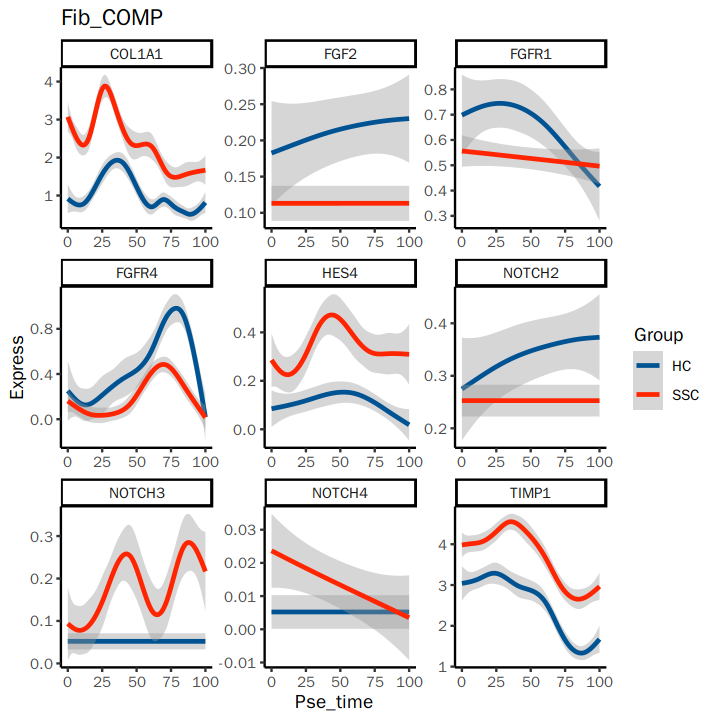

In [16]:
# --- Plot gene expression along Lineage2:RNA, TFs, AUCs.
options(repr.plot.height = 6, repr.plot.width = 6)
pseu.l <- subset(immune, Lineage2 != 'NA')
metadata <- pseu.l@meta.data %>% tibble::rownames_to_column(var='Cell') %>% 
                .[,c('Cell','Group','Lineage2_pct')]

genes <- c('FGF2', 'FGFR1', 'FGFR4', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'COL1A1', 'HES4', 'TIMP1')
gene.seurat <- immune[['RNA']]@data[genes,] %>% 
                                    as.matrix() %>%
                                    t() %>% 
                                    as.data.frame() %>% 
                                    tibble::rownames_to_column(var='Cell') %>% 
                                    left_join(metadata, by = 'Cell')  %>% 
                                    pivot_longer(!c(Cell, genes,Group), names_to = 'Lineage', values_to = 'Pse_time') %>%
                                    pivot_longer(!c(Cell,Group,Lineage,Pse_time), names_to = 'Gene', values_to = 'Express')
ggplot(data = gene.seurat, aes(x=Pse_time, y=Express, group = Group, color=Group))+  #, linetype = Group
  geom_smooth()+
  scale_colour_manual(values = c("#005393","#ff2500"))+
  theme_classic()+
  facet_wrap(~Gene, nrow=3, scales = 'free') +
  ggtitle('Fib_COMP')
ggsave('./figures/L2_RNA.pdf',width = 6, height = 5)

# tfs <- c('TEAD2', 'GLI1', 'GATA4', 'SOX4', 'TWIST1', 'STAT1')
# tf.seurat <- immune[['TF']]@data[tfs,] %>% 
#                                     as.matrix() %>%
#                                     t() %>% 
#                                     as.data.frame() %>% 
#                                     tibble::rownames_to_column(var='Cell') %>% 
#                                     left_join(metadata, by = 'Cell')  %>% 
#                                     pivot_longer(!c(Cell, tfs, Group), names_to = 'Lineage', values_to = 'Pse_time') %>%
#                                     pivot_longer(!c(Cell,Group,Lineage,Pse_time), names_to = 'Gene', values_to = 'Express')
# ggplot(data = tf.seurat, aes(x=Pse_time, y=Express, group = Group, color=Group))+  #, linetype = Group
#   geom_smooth()+
#   scale_colour_manual(values = c("#005393","#ff2500"))+
#   theme_classic()+
#   facet_wrap(~Gene, nrow=3, scales = 'free') +
#   ggtitle('Fib_COMP')
# ggsave('./figures/L2_TFs.pdf',width = 5, height = 5)

In [15]:
# # --- Calculate SnnTopGenes
# immune <- immune.cluster
# res_list <- c("integrated_snn_res.0.1","integrated_snn_res.0.2","integrated_snn_res.0.4","integrated_snn_res.0.8","integrated_snn_res.1.2","integrated_snn_res.1.6",
#               "integrated_snn_res.2","integrated_snn_res.3")
# for (res in res_list){
#     Idents(immune) <- res
#     markers <- FindAllMarkers(immune, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
#     saveRDS(markers,  file = paste0('./SnnGenes/', res, '.rds.gz'), compress = "gzip")
#     }

# Idents(immune) <- 'fib_CellType'
# markers <- FindAllMarkers(immune, only.pos = FALSE, min.pct = 0.25, logfc.threshold = 0.25)
# saveRDS(markers,  file = paste0('./SnnGenes/CellType.rds.gz'), compress = "gzip")

In [7]:
# --- Create Scoupe_Loom file
library(SCopeLoomR)
library(hdf5r)
immune <- readRDS('./fib_sm_pericyte2.rds')
# --- 01 Create a loom file
build_loom(file.name = "immune.loom",
        dgem = immune@assays$RNA@counts,
        title = "fibroblaste",
        default.embedding = immune@reductions$umap@cell.embeddings,
        default.embedding.name = "umap.rna")

loom <- open_loom("immune.loom", mode = "r+")
# --- 02 Add hierachy
add_hierarchy(
  loom = loom,
  hierarchy = create_hierarchy(
    level.1.name = "SSc-ILD",
    level.2.name = "Lung-fibroblast"
  )
)
# --- 03 Add embedding(s)
add_embedding(loom = loom, 
              embedding = immune@reductions$pca@cell.embeddings,
              name = "pca")

# --- 04 Add MetaDate
names(loom[["col_attrs"]])
add_col_attr(loom = loom, key = "Sample", value = immune@meta.data$SamNum, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Group", value = immune@meta.data$Group, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Site", value = immune@meta.data$Site, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Age", value = immune@meta.data$Age, as.metric = TRUE)
add_col_attr(loom = loom, key = "Gender", value = immune@meta.data$Gender, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Cohort", value = immune@meta.data$Cohort, as.annotation = TRUE)

immune@meta.data$fib_CellType <- as.character(immune@meta.data$fib_CellType)
add_col_attr(loom = loom, key = "CellType", value = immune@meta.data$fib_CellType, as.annotation = TRUE)

names(loom[["col_attrs"]])

# --- 05 Add Seurat clusters and markers
add_seurat_clustering(loom = loom,
        seurat = immune,
        seurat.assay = "RNA",
        seurat.clustering.prefix = "celltype.res.",
        seurat.markers.file.path.list = 
          list(celltype.res.0.1 = './SnnGenes/ct_res.0.1.rds.gz'),
        seurat.marker.metric.accessors = c("avg_log2FC", "p_val"),
        seurat.marker.metric.names = c("Avg. log2FC", "P-value"),
        seurat.marker.metric.description = c("Average log fold change", "Adjusted p-value (BF)")
)

# --- 06 save loom file
close_loom(loom)


载入程辑包：‘SCopeLoomR’


The following object is masked from ‘package:base’:

    flush



载入程辑包：‘hdf5r’


The following object is masked from ‘package:SummarizedExperiment’:

    values


The following object is masked from ‘package:GenomicRanges’:

    values


The following object is masked from ‘package:S4Vectors’:

    values


The following object is masked from ‘package:purrr’:

    flatten_df




[1] "Adding global attributes..."
[1] "Adding matrix..."
  |======================================================================| 100%[1] "Adding column attributes..."
[1] "Adding default metrics nUMI..."
[1] "Adding default metrics nGene..."
[1] "Adding default embedding..."
[1] "Adding row attributes..."
[1] "Adding columns graphs..."
[1] "Adding row graphs..."
[1] "Adding layers..."
[1] "Adding embedding pca..."


[1] "CellID"       "Embedding"    "Embeddings_X" "Embeddings_Y" "nGene"       
[6] "nUMI"

ERROR: Error in ds$write_low_level(robj): For STRING enum type, an R object of type character has to be passed

